#Credit Union

## Instructions

Uncle Steve has recently opened a new credit union in Kingston, named *Uncle Steve's Credit Union*. He plans to disrupt the local market by instaneously providing credit to customers.

The first step in Uncle Steve's master plan is to create a model to predict whether an application has *good risk* or *bad risk*. He has outsourced the creation of this model to you.

You are to create a classification model to predict whether a loan applicant has good risk or bad risk. You will use data  that Uncle Steve bought from another credit union (somewhere in Europe, he thinks?) that has around 6000 instances and a number of demographics features (e.g., `Sex`, `DateOfBirth`, `Married`), loan details (e.g., `Amount`, `Purpose`), credit history (e.g., number of loans), as well as an indicator (called `BadCredit` in the dataset) as to whether that person was a bad risk.


**Your tasks**

To examine the effects of the various ML stages, you are to create the model several times, each time adding more sophistication, and measuring how much the model improved (or not). In particular, you will:

0. Split the data in training and testing. Don't touch the testing data again, for any reason, until step 5. We are pretending that the testing data is "future, unseen data that our model won't see until production." I'm serious, don't touch it. I'm watching you!
1. Build a baseline model - no feature engineering, no feature selection, no hyperparameter tuning (just use the default settings), nothing fancy. (You may need to do some basic feature transformations, e.g., encoding of categorical features, or dropping of features you do not think will help or do not want to deal with yet.) Measure the performance using K-fold cross validation (recommended: [`sklearn.model_selection.cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score)) on the training data. Use at least 5 folds, but more are better. Choose a [`scoring` parameter](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) (i.e., classification metric) that you feel is appropriate for this task. Don't use accuracy. Print the mean score of your model.
2. Add a bit of feature engineering. The [`sklearn.preprocessing`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) module contains many useful transformations. Engineer at least three new features. They don't need to be especially ground-breaking or complicated. Dimensionality reduction techniques like [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) are fair game but not required. (If you do use dimensionality reduction techniques, it would only count as "one" new feature for the purposes of this assignment, even though I realize that PCA creates many new "features" (i.e., principal componentns).) Re-train your baseline model. Measure performance. Compare to step 1.
3. Add feature selection. The [`sklearn.feature_selection`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection) has some algorithms for you to choose from. After selecting features, re-train your model, measure performance, and compare to step 2.
4. Add hyperparameter tuning. Make reasonable choices and try to find the best (or at least, better) hyperparameters for your estimator and/or transformers. It's probably a good idea to stop using `cross_val_score` at this point and start using [`sklearn.model_selection.GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) as it is specifically built for this purpose and is more convienient to use. Measure performance and compare to step 3.
5. Finally, estimate how well your model will work in production. Use the testing data (our "future, unseen data") from step 0. Transform the data as appropriate (easy if you've built a pipeline, a little more difficult if not), use the model from step 4 to get predictions, and measure the performance. How well did we do? 


**Marking**

Each part will be marked for:
- *Correctness*. Code clearly and fully performs the task specified.
- *Reproducibility*. Code is fully reproducible. I.e., you (and I) should be able to run this Notebook again and again, from top to bottom, and get the same results each and every time.
- *Style*. Code is organized. All parts commented with clear reasoning and rationale. No old code laying around. Code easy to follow. 


**Tips**
- The origins of the dataset are a bit of a mystery. Assume the data set is recent (circa 2021) and up-to-date. Assume that column names are correct and accurate.
- You don't need to experiment with more than one algorithm/estimator. Just choose one (e.g., [`sklearn.tree.DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier), [`sklearn.ensemble.RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier), [`sklearn.linear_model.LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression), [`sklearn.svm.LinearSVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC), whatever) and stick with it for this question. 
- There is no minimum accuracy/precision/recall for this question. I.e., your mark will not be based on how good your model is. Rather, you mark will be based on good your process is.
- Watch out for data leakage and overfitting. In particular, be sure to `fit()` any estimators and transformers (collectively, *objects*) only to the training data, and then use the objects' `transform()` methods on both the training and testing data. [Data School](https://www.youtube.com/c/dataschool/featured) has a [helpful video](https://www.youtube.com/watch?v=g2XsZdwbCCs) about this. [Pipelines](https://www.youtube.com/watch?v=1Y6O9nCo0-I) are very helpful here and make your code shorter and more robust (at the expense of making it harder to understand), and I recommend using them, but they are not required for this assignment.
- Create as many code cells as you need. In general, each cell should do one "thing."
-	Don't print large volumes of output. E.g., don't do: `df.head(100)`




## 3.0: Load data and split

In [258]:
# DO NOT MODIFY THIS CELL

# First, we'll read the provided labeled training data
df3 = pd.read_csv("https://drive.google.com/uc?export=download&id=1wOhyCnvGeY4jplxI8lZ-bbYN3zLtickf")
df3.info()

from sklearn.model_selection import train_test_split

X = df3.drop('BadCredit', axis=1) #.select_dtypes(['number'])
y = df3['BadCredit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   UserID             6000 non-null   object
 1   Sex                6000 non-null   object
 2   PreviousDefault    6000 non-null   int64 
 3   FirstName          6000 non-null   object
 4   LastName           6000 non-null   object
 5   NumberPets         6000 non-null   int64 
 6   PreviousAccounts   6000 non-null   int64 
 7   ResidenceDuration  6000 non-null   int64 
 8   Street             6000 non-null   object
 9   LicensePlate       6000 non-null   object
 10  BadCredit          6000 non-null   int64 
 11  Amount             6000 non-null   int64 
 12  Married            6000 non-null   int64 
 13  Duration           6000 non-null   int64 
 14  City               6000 non-null   object
 15  Purpose            6000 non-null   object
 16  DateOfBirth        6000 non-null   object


In [259]:
print(df3);print(X_train);print(y_train)

           UserID Sex  PreviousDefault  ...              City    Purpose  DateOfBirth
0     218-84-8180   F                0  ...        Port Keith   Vacation   1964-04-07
1     395-49-9764   M                0  ...        Lake Debra     NewCar   1978-06-02
2     892-81-4890   F                0  ...  North Judithbury     NewCar   1972-03-18
3     081-11-7963   F                0  ...         Lake Chad      Other   1985-02-26
4     347-03-9639   M                0  ...  North Judithbury   Vacation   1983-08-08
...           ...  ..              ...  ...               ...        ...          ...
5995  290-91-5587   F                0  ...    East Jessetown     Repair   1968-08-25
5996  137-27-2025   M                0  ...          Lisatown     NewCar   1969-08-15
5997  061-50-0051   M                0  ...    New Roberttown  Education   1977-04-12
5998  239-62-7143   M                0  ...  North Judithbury     NewCar   1966-06-12
5999  367-72-7571   F                0  ...  North Jud

In [260]:
#Check Null values
X_train.isna().sum()

UserID               0
Sex                  0
PreviousDefault      0
FirstName            0
LastName             0
NumberPets           0
PreviousAccounts     0
ResidenceDuration    0
Street               0
LicensePlate         0
Amount               0
Married              0
Duration             0
City                 0
Purpose              0
DateOfBirth          0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


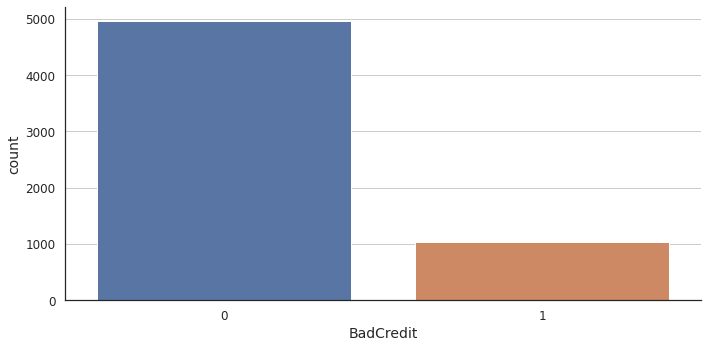

In [261]:
#Traget variable plot
import seaborn as sns
sns.factorplot('BadCredit', data=df3, aspect=2, kind='count');

(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4e9159e410>)

Text(0.5, 1.0, 'UserID')

Text(0.5, 1.0, 'Sex')

Text(0.5, 1.0, 'PreviousDefault')

Text(0.5, 1.0, 'FirstName')

Text(0.5, 1.0, 'LastName')

Text(0.5, 1.0, 'NumberPets')

Text(0.5, 1.0, 'PreviousAccounts')

Text(0.5, 1.0, 'ResidenceDuration')

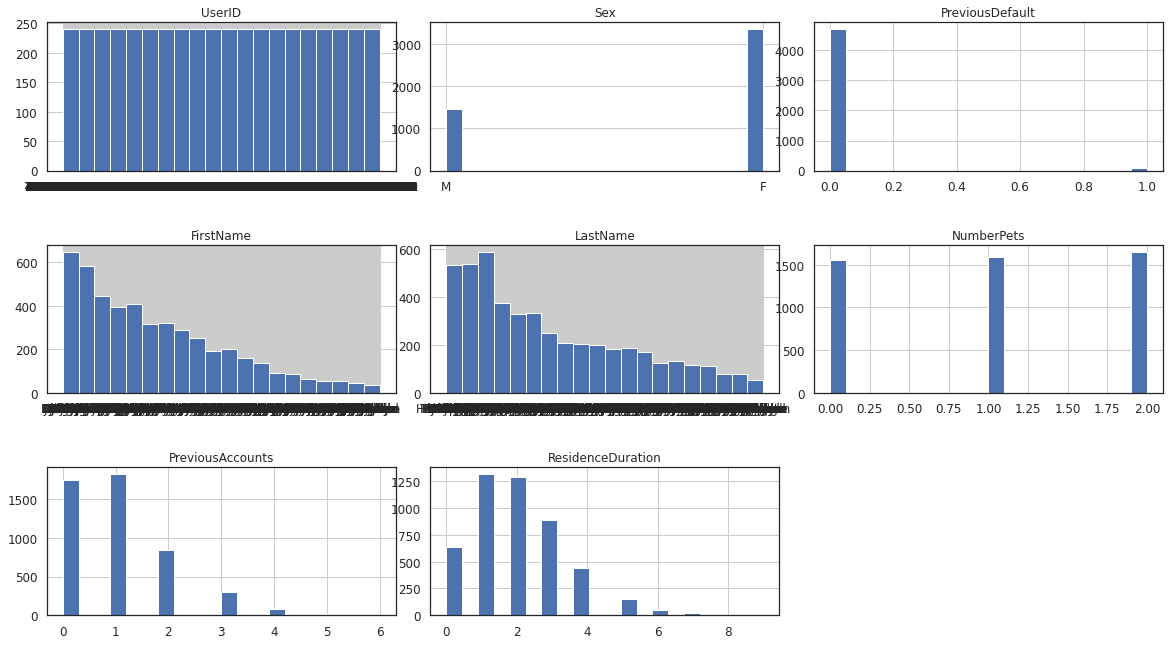

In [262]:
# Histogram of each feature
import itertools

col = X_train.columns[:8]
plt.subplots(figsize = (20, 15))
length = len(col)

for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot((length/2), 3, j + 1)
    plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
    X_train[i].hist(bins = 20)
    plt.title(i)
plt.show()

In [263]:
for i in X_train.columns:
    print('{} - {}'.format(i,X_train[i].unique().shape[0]))

UserID - 4800
Sex - 2
PreviousDefault - 2
FirstName - 568
LastName - 907
NumberPets - 3
PreviousAccounts - 7
ResidenceDuration - 10
Street - 4800
LicensePlate - 4799
Amount - 1641
Married - 2
Duration - 6
City - 20
Purpose - 8
DateOfBirth - 3570


In [264]:
bool_series = X_train.duplicated(keep=False)
print('Boolean series:')
print(bool_series.value_counts())
print('\n')
print('DataFrame after removing all the instances of the duplicate rows:')
# The `~` sign is used for negation. It changes the boolean value True to False and False to True
X_train[~bool_series]

Boolean series:
False    4800
dtype: int64


DataFrame after removing all the instances of the duplicate rows:


,UserID,Sex,PreviousDefault,FirstName,LastName,NumberPets,PreviousAccounts,ResidenceDuration,Street,LicensePlate,Amount,Married,Duration,City,Purpose,DateOfBirth
3897,236-22-6766,M,0,Jerry,Black,2,0,2,0466 Brown Wall,3-U8282,3329,0,12,New Roberttown,Household,1970-04-22
5628,766-20-5986,F,0,Julia,Jones,0,2,2,6095 Larson Causeway,LWO 912,2996,0,36,Ericmouth,Household,1964-06-19
1756,744-25-5747,F,0,Abigail,Estrada,2,0,3,293 Michael Divide,715 OQT,2470,0,24,East Jill,NewCar,1975-02-17
2346,463-78-3098,F,0,Jessica,Jones,2,1,2,02759 Williams Roads,869 SYK,3745,0,30,Lake Debra,UsedCar,1977-02-16
2996,414-44-6527,M,0,William,Shaffer,0,1,3,19797 Turner Rue,48-A601,3549,0,36,North Judithbury,Vacation,1976-07-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,888-92-1021,F,0,Carly,Tanner,0,1,1,99179 Erin Stravenue,98G XY9,3607,1,24,Robinsonshire,NewCar,1973-01-04
5191,875-64-1301,F,0,Jasmine,Chambers,2,1,0,368 Jackson Pass Suite 887,430M,3186,0,30,North Judithbury,NewCar,1973-12-25
5226,584-74-0175,F,0,Danielle,Hendrix,2,1,3,898 Kayla Manor Apt. 879,293 MHY,2387,1,36,Lake Roberto,Business,1969-02-25
5390,507-44-5910,F,0,Dana,Taylor,1,1,3,7343 Kimberly Flat,4JIY 37,3620,0,12,Lake Debra,Other,1967-01-09


In [265]:
X_train.dtypes

UserID               object
Sex                  object
PreviousDefault       int64
FirstName            object
LastName             object
NumberPets            int64
PreviousAccounts      int64
ResidenceDuration     int64
Street               object
LicensePlate         object
Amount                int64
Married               int64
Duration              int64
City                 object
Purpose              object
DateOfBirth          object
dtype: object

In [266]:
from datetime import datetime
X_train.DateOfBirth = pd.to_datetime(X_train.DateOfBirth, format='%Y-%m-%d')
X_train['year']  = X_train.DateOfBirth.dt.year
X_train['month'] = X_train.DateOfBirth.dt.month
X_train['day'] = X_train.DateOfBirth.dt.day

def Age(data):
  now = datetime.now().year
  data['Age'] = now- data['year']
  data['Age']=data['Age'].replace([2021],0)
  return data

X_train= Age(X_train)
X_train['DateOfBirth']=X_train['DateOfBirth'].apply(lambda x: x.toordinal())

X_train.dtypes

UserID               object
Sex                  object
PreviousDefault       int64
FirstName            object
LastName             object
NumberPets            int64
PreviousAccounts      int64
ResidenceDuration     int64
Street               object
LicensePlate         object
Amount                int64
Married               int64
Duration              int64
City                 object
Purpose              object
DateOfBirth           int64
year                  int64
month                 int64
day                   int64
Age                   int64
dtype: object

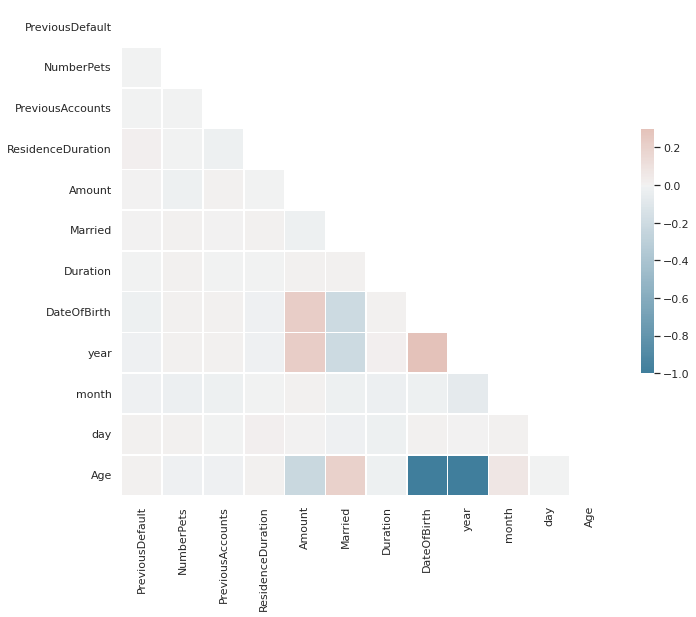

In [267]:
from string import ascii_letters
sns.set_theme(style="white")

# Generate a large random dataset
rs = np.random.RandomState(80)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = X_train.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [268]:
X_train = X_train.drop(labels=['UserID','DateOfBirth', 'Street', 'LicensePlate','FirstName','LastName'], axis=1)


In [269]:
feat = [x for x in X_train.columns]
for col in feat:
  print(X_train.groupby([col]).size())

Sex
F    3338
M    1462
dtype: int64
PreviousDefault
0    4703
1      97
dtype: int64
NumberPets
0    1552
1    1596
2    1652
dtype: int64
PreviousAccounts
0    1741
1    1822
2     837
3     301
4      76
5      16
6       7
dtype: int64
ResidenceDuration
0     641
1    1317
2    1287
3     886
4     441
5     155
6      49
7      19
8       4
9       1
dtype: int64
Amount
2158    1
2262    1
2266    1
2270    1
2319    1
       ..
4821    1
4825    1
4935    1
4964    1
4982    1
Length: 1641, dtype: int64
Married
0    2374
1    2426
dtype: int64
Duration
6      420
12     507
18     710
24     977
30    1165
36    1021
dtype: int64
City
Cassandraton         130
East Jessetown       341
East Jill            652
Ericmouth            155
Herrerafurt           96
Jacquelineland        56
Lake Chad             97
Lake Debra           278
Lake Roberto         164
Lisatown             169
New Jessica           67
New Kellystad         99
New Roberttown       467
North Judithbury    1319
N

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


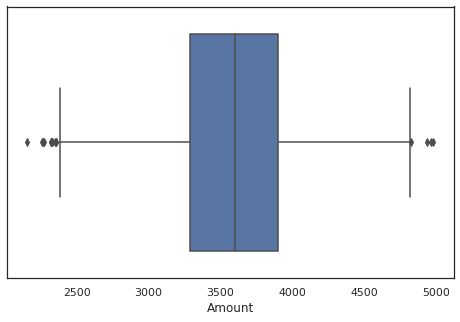

In [270]:
sns.boxplot(X_train.Amount)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


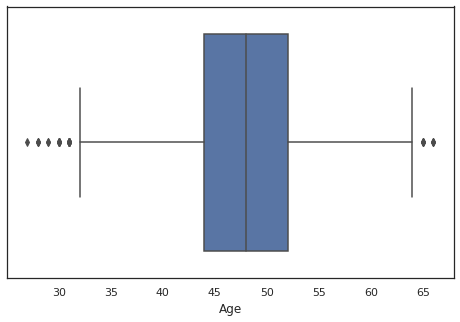

In [271]:
sns.boxplot(X_train.Age)

In [272]:
for x in X_train.columns:
  if X_train[x].dtype == 'object':
    X_train[x]= X_train[x].astype('category')

In [273]:
y_b_train = pd.to_numeric(y_train)
!pip install category_encoders
from category_encoders import TargetEncoder

te = TargetEncoder()

def target_encoder(col, target):
    for i in range(len(X_train.columns)):
        col.iloc[:,i] = te.fit_transform(col, target)
    return col

df_te_train = target_encoder(X_train, y_train)

In [274]:
df_te_train

,Sex,PreviousDefault,NumberPets,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,City,Purpose,year,month,day,Age
3897,0.178523,0,2,0,2,3329,0,12,0.162741,0.146444,1970,4,22,51
5628,0.168664,0,0,2,2,2996,0,36,0.193548,0.146444,1964,6,19,57
1756,0.168664,0,2,0,3,2470,0,24,0.176380,0.182131,1975,2,17,46
2346,0.168664,0,2,1,2,3745,0,30,0.151079,0.169691,1977,2,16,44
2996,0.178523,0,0,1,3,3549,0,36,0.171342,0.154286,1976,7,27,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0.168664,0,0,1,1,3607,1,24,0.170635,0.182131,1973,1,4,48
5191,0.168664,0,2,1,0,3186,0,30,0.171342,0.182131,1973,12,25,48
5226,0.168664,0,2,1,3,2387,1,36,0.189024,0.246377,1969,2,25,52
5390,0.168664,0,1,1,3,3620,0,12,0.151079,0.139189,1967,1,9,54


## 3.1: Baseline model

In [275]:
# Models to be tested: L ogistic Regression, KNearest, SVM, Decision Tree, Random Forest, XGBoost, LightGBM

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

In [276]:
classifiers = {
    "RandomForest" : RandomForestClassifier(),
    "Light GBM" :  lgb.LGBMClassifier()
}

In [277]:
train_scores = []
test_scores = []

for key, classifier in classifiers.items():
    classifier.fit(df_te_train,y_train )
    train_score = round(classifier.score(df_te_train, y_train),2)
    train_scores.append(train_score)
 

print(train_scores)

RandomForestClassifier()

LGBMClassifier()

[1.0, 0.97]


In [278]:
#Cross validation score

from sklearn.model_selection import cross_val_score

train_cross_scores = []
test_cross_scores = []

for key, classifier in classifiers.items():
    classifier.fit(df_te_train, y_train)
    train_score = cross_val_score(classifier, df_te_train, y_train, cv=5,scoring='f1_weighted')
    train_cross_scores.append(round(train_score.mean(),2))
  
    
print(train_cross_scores)

RandomForestClassifier()

LGBMClassifier()

[0.87, 0.87]


## 3.2: Feature engineering

In [279]:
#Merge label and training set to handle outlier
train_df = pd.concat([X_train,y_train],axis=1)
train_df

,Sex,PreviousDefault,NumberPets,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,City,Purpose,year,month,day,Age,BadCredit
3897,0.178523,0,2,0,2,3329,0,12,0.162741,0.146444,1970,4,22,51,0
5628,0.168664,0,0,2,2,2996,0,36,0.193548,0.146444,1964,6,19,57,0
1756,0.168664,0,2,0,3,2470,0,24,0.176380,0.182131,1975,2,17,46,0
2346,0.168664,0,2,1,2,3745,0,30,0.151079,0.169691,1977,2,16,44,0
2996,0.178523,0,0,1,3,3549,0,36,0.171342,0.154286,1976,7,27,45,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0.168664,0,0,1,1,3607,1,24,0.170635,0.182131,1973,1,4,48,0
5191,0.168664,0,2,1,0,3186,0,30,0.171342,0.182131,1973,12,25,48,0
5226,0.168664,0,2,1,3,2387,1,36,0.189024,0.246377,1969,2,25,52,0
5390,0.168664,0,1,1,3,3620,0,12,0.151079,0.139189,1967,1,9,54,0


In [280]:
def remove_outlier(col):
    q25 = col.quantile(0.25)
    q75 = col.quantile(0.75)
    iqr = q75 - q25
    cutoff = iqr*1.5
    lower = q25 - cutoff
    upper = q75 + cutoff
    return lower, upper

lower, upper = remove_outlier(train_df.Amount)
train_df = train_df.loc[(train_df.Amount > lower) & (train_df.Amount < upper)]
lower1, upper1 = remove_outlier(train_df.Age)
train_df = train_df.loc[(train_df.Age > lower1) & (train_df.Age < upper1)]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


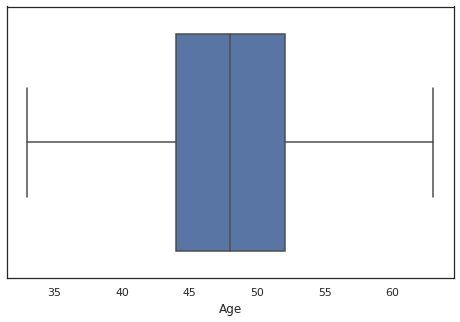

In [281]:
sns.boxplot(train_df.Age)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


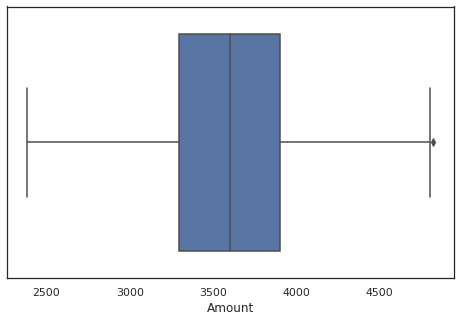

In [282]:
sns.boxplot(train_df.Amount)


(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4e88367250>)

Text(0.5, 1.0, 'Sex')

Text(0.5, 1.0, 'PreviousDefault')

Text(0.5, 1.0, 'NumberPets')

Text(0.5, 1.0, 'PreviousAccounts')

Text(0.5, 1.0, 'ResidenceDuration')

Text(0.5, 1.0, 'Amount')

Text(0.5, 1.0, 'Married')

Text(0.5, 1.0, 'Duration')

Text(0.5, 1.0, 'City')

Text(0.5, 1.0, 'Purpose')

Text(0.5, 1.0, 'year')

Text(0.5, 1.0, 'month')

Text(0.5, 1.0, 'day')

Text(0.5, 1.0, 'Age')

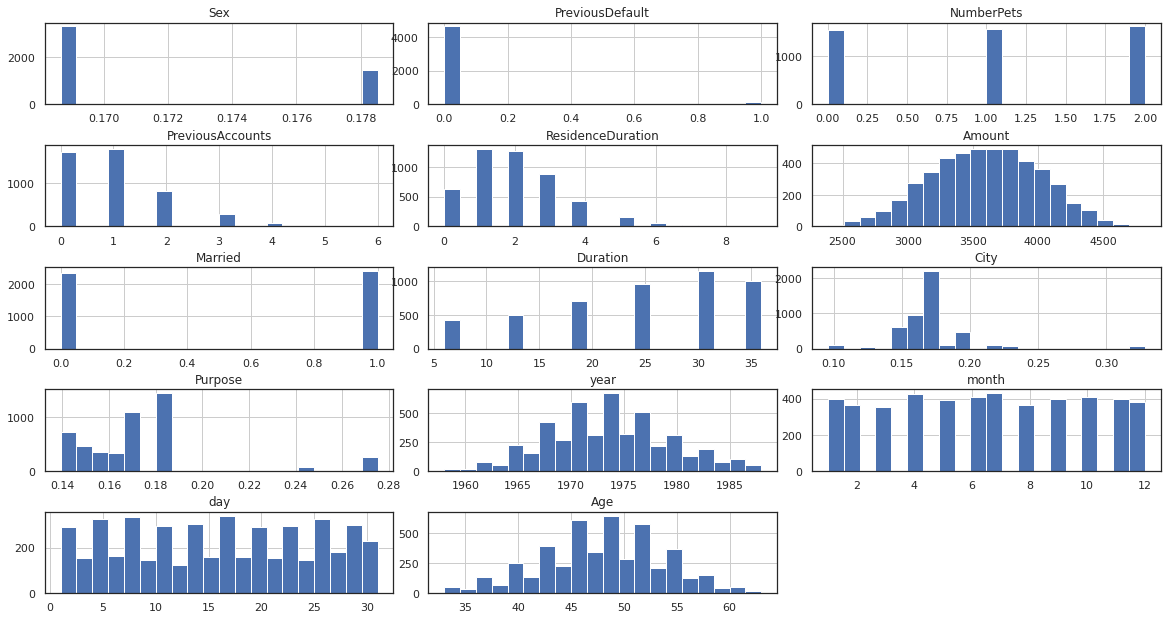

In [283]:
import matplotlib.pyplot as plt
# Histogram of each feature
import itertools

col = train_df.columns[:14]
plt.subplots(figsize = (20, 15))
length = len(col)

for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot((length/2), 3, j + 1)
    plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
    train_df[i].hist(bins = 20)
    plt.title(i)
plt.show()

In [284]:
train_df['age_binned'] = pd.qcut(train_df.Age, q=[0, .25, .50, .75, 1])
train_df['amt_binned'] = pd.qcut(train_df.Amount, q=[0, .25, .50, .75, 1])
train_df['year_binned'] = pd.qcut(train_df.year, q=[0, .25, .50, .75, 1])
train_df['day_binned'] = pd.qcut(train_df.day, q=[0, .25, .50, .75, 1])
train_df['month_binned'] = pd.qcut(train_df.month, q=[0, .25, .50, .75, 1])

train_df.drop(columns=['Age', 'Amount', 'year','day','month'], inplace=True)

In [285]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
train_df['Age']= le.fit_transform(train_df['age_binned'])
train_df['amount']= le.fit_transform(train_df['amt_binned'])
train_df['year']= le.fit_transform(train_df['year_binned'])
train_df['day']= le.fit_transform(train_df['day_binned'])
train_df['month']= le.fit_transform(train_df['month_binned'])

In [286]:
train_df.drop(columns=['age_binned','amt_binned','year_binned','day_binned','month_binned'],inplace=True)

In [287]:
from sklearn.preprocessing import RobustScaler

Scaled = pd.DataFrame(RobustScaler().fit_transform(train_df), columns=train_df.columns)
Scaled

,Sex,PreviousDefault,NumberPets,PreviousAccounts,ResidenceDuration,Married,Duration,City,Purpose,BadCredit,Age,amount,year,day,month
0,1.0,0.0,0.5,-0.5,0.0,-1.0,-1.0,-0.569980,-0.651439,0.0,0.5,0.0,0.0,0.5,-0.5
1,0.0,0.0,-0.5,0.5,0.0,-1.0,1.0,1.471597,-0.651439,0.0,1.0,-0.8,-0.5,0.5,0.0
2,0.0,0.0,0.5,-0.5,0.5,-1.0,0.0,0.333892,0.348561,0.0,0.0,-0.8,0.5,0.5,-0.5
3,0.0,0.0,0.5,0.0,0.0,-1.0,0.5,-1.342792,0.000000,0.0,-0.5,0.8,0.5,0.0,-0.5
4,1.0,0.0,-0.5,0.0,0.5,-1.0,1.0,0.000000,-0.431690,0.0,0.0,0.0,0.5,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4727,0.0,0.0,-0.5,0.0,-0.5,0.0,0.0,-0.046852,0.348561,0.0,0.0,0.8,0.0,-0.5,-0.5
4728,0.0,0.0,0.5,0.0,-1.0,-1.0,0.5,0.000000,0.348561,0.0,0.0,-0.8,0.0,1.0,1.0
4729,0.0,0.0,0.5,0.0,0.5,0.0,1.0,1.171797,2.148827,0.0,0.5,-0.8,-0.5,1.0,-0.5
4730,0.0,0.0,0.0,0.0,0.5,-1.0,-1.0,-1.342792,-0.854715,0.0,1.0,0.8,-0.5,0.0,-0.5


In [288]:
a_target_0 = train_df[train_df.BadCredit == 0].BadCredit.count() / train_df.BadCredit.count()
a_target_1 = train_df[train_df.BadCredit == 1].BadCredit.count() / train_df.BadCredit.count()

print(a_target_0)
print(a_target_1)

0.8328402366863905
0.16715976331360946


In [289]:
a = Scaled.loc[:, Scaled.columns != 'BadCredit']
b = Scaled.loc[:, Scaled.columns == 'BadCredit']

In [290]:
from imblearn.over_sampling import SMOTE
from collections import Counter

oversample = SMOTE()

a_over,b_over = oversample.fit_resample(a,b)

In [291]:
a_target_0 = b_over[b_over.BadCredit == 0].BadCredit.count() / b_over.BadCredit.count()
a_target_1 = b_over[b_over.BadCredit == 1].BadCredit.count() / b_over.BadCredit.count()

print(a_target_0)
print(a_target_1)

0.5
0.5


PreviousAccounts   -0.011286
month              -0.010990
NumberPets         -0.010054
Sex                 0.001540
Duration            0.090867
City                0.103658
Purpose             0.113972
year                0.598062
amount              0.605755
BadCredit           1.000000
Name: BadCredit, dtype: float64


<Figure size 1440x1440 with 0 Axes>

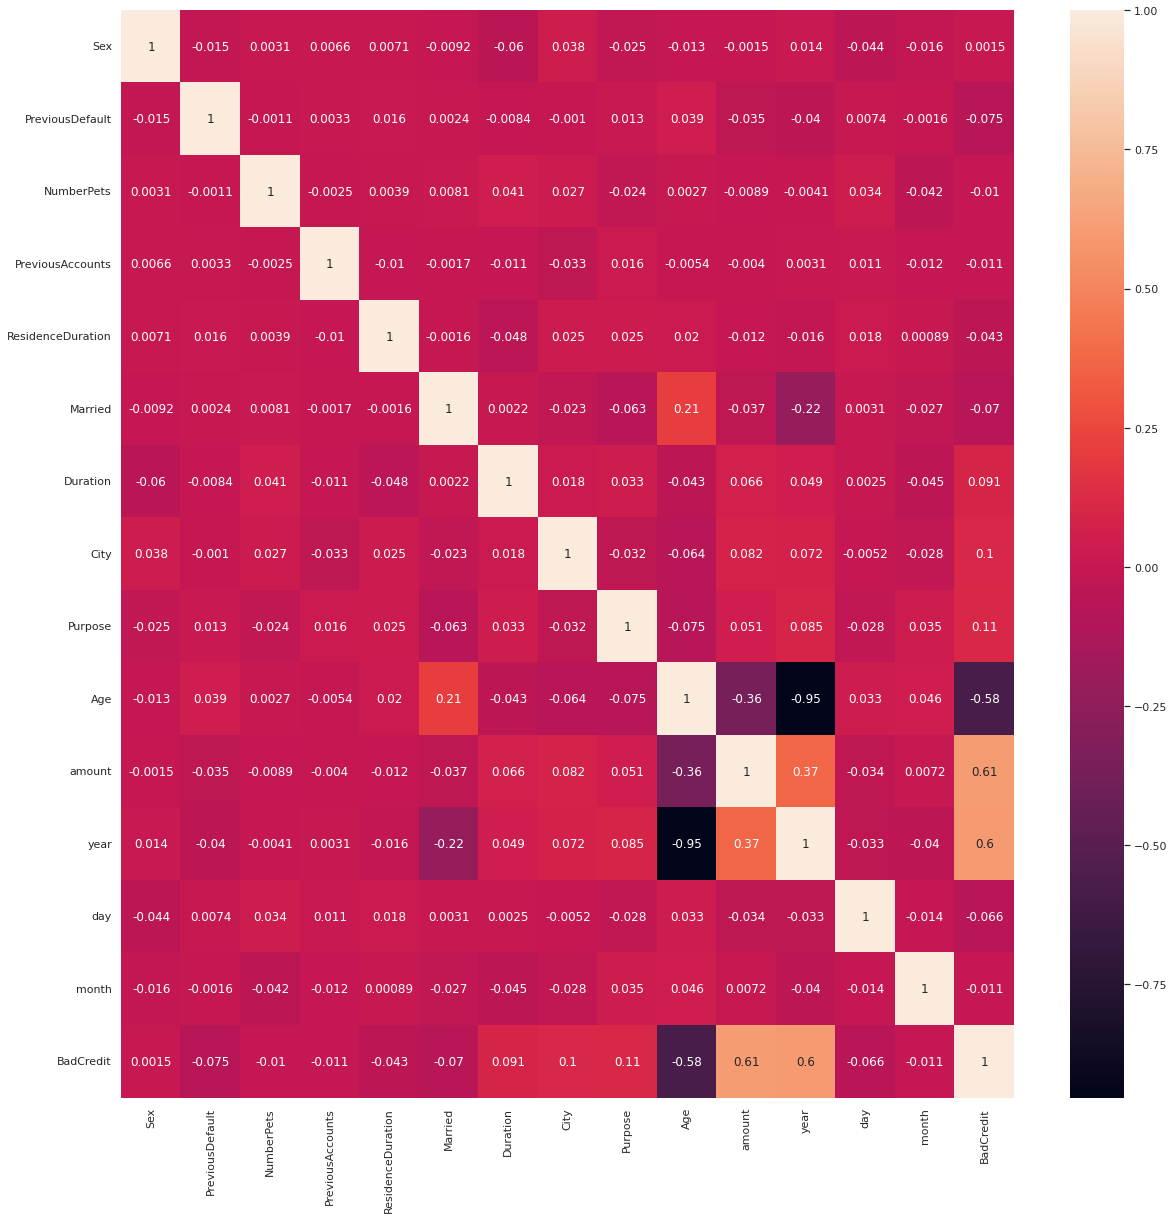

In [292]:
train = pd.concat([a_over,b_over],axis=1)
cm_b = train.corr()

print(cm_b.BadCredit.sort_values().tail(10))

plt.figure(figsize=(20,20))
sns.heatmap(cm_b, xticklabels=train.columns, yticklabels=train.columns,annot=True)

In [293]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
#pca_test = PCA(n_components=14)
#pca_test.fit(a_over)
#sns.set(style='whitegrid')
#plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
#plt.xlabel('number of components')
#plt.ylabel('cumulative explained variance')
#plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
#display(plt.show())
#evr = pca_test.explained_variance_ratio_
#cvr = np.cumsum(pca_test.explained_variance_ratio_)
#pca_df = pd.DataFrame()
#pca_df['Cumulative Variance Ratio'] = cvr
#pca_df['Explained Variance Ratio'] = evr
#display(pca_df.head(10))

In [294]:
#pca = PCA(n_components=10)
#pca.fit(a_over)
#X_train_scaled_pca = pca.transform(a_over)



In [295]:
len(X_train_scaled_pca)

7882

In [296]:
train_cross_scores = []

for key, classifier in classifiers.items():
    classifier.fit(a_over, b_over)
    train_score = cross_val_score(classifier, a_over, b_over, cv=5,scoring='f1_weighted')
    train_cross_scores.append(round(train_score.mean(),2))
  
    
print(train_cross_scores)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier()

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 

LGBMClassifier()

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

[0.92, 0.85]


## 3.3: Feature selection

In [297]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
X_train_new=selector.fit_transform(a_over)



In [298]:
train_cross_scores = []

for key, classifier in classifiers.items():
    classifier.fit(X_train_new, b_over)
    train_score = cross_val_score(classifier, X_train_new, b_over, cv=5,scoring='f1_weighted')
    train_cross_scores.append(round(train_score.mean(),2))
  
    
print(train_cross_scores)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier()

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 

LGBMClassifier()

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

[0.92, 0.85]


## 3.4: Hyperparameter tuning

In [299]:
classifiers = {
    "LogisticRegression" : LogisticRegression(),
    "KNeighbors" : KNeighborsClassifier(),
    "SVC" : SVC(),
    "DecisionTree" : DecisionTreeClassifier(),
    "RandomForest" : RandomForestClassifier(),
     "Light GBM" :  lgb.LGBMClassifier()

}

In [300]:
#Cross validation score

from sklearn.model_selection import cross_val_score

train_cross_scores = []
test_cross_scores = []

for key, classifier in classifiers.items():
    classifier.fit(a_over, b_over)
    train_score = cross_val_score(classifier, X_train_new, b_over, cv=5,scoring='f1_weighted')
    train_cross_scores.append(round(train_score.mean(),2))
  
    
print(train_cross_scores)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

KNeighborsClassifier()

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

SVC()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

DecisionTreeClassifier()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestClassifier()

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 

LGBMClassifier()

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

[0.87, 0.88, 0.88, 0.88, 0.92, 0.85]


In [301]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

rfc_params = {'n_estimators':[5,20,50,150],
              'criterion':['gini', 'entropy'],
              'max_depth':[5,20,50,None],
              'min_samples_split':[2,5,10,20]}


grid_rfc = GridSearchCV(RandomForestClassifier(), 
                        rfc_params, 
                        cv=5, 
                        scoring='f1_weighted').fit(X_train_new, b_over)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 

In [302]:
X_test.DateOfBirth = pd.to_datetime(X_test.DateOfBirth, format='%Y-%m-%d')
X_test['year']  = X_test.DateOfBirth.dt.year
X_test['month'] = X_test.DateOfBirth.dt.month
X_test['day'] = X_test.DateOfBirth.dt.day

def Age(data):
  now = datetime.now().year
  data['Age'] = now- data['year']
  data['Age']=data['Age'].replace([2021],0)
  return data

X_test= Age(X_test)
X_test['DateOfBirth']=X_test['DateOfBirth'].apply(lambda x: x.toordinal())

X_test = X_test.drop(labels=['UserID','DateOfBirth', 'Street', 'LicensePlate','FirstName','LastName'], axis=1)

for x in X_test.columns:
  if X_test[x].dtype == 'object':
    X_test[x]= X_test[x].astype('category')


y_b_test = pd.to_numeric(y_test)

def target_encoder(col, target):
    for i in range(len(X_test.columns)):
        col.iloc[:,i] = te.fit_transform(col, target)
    return col

df_te_train = target_encoder(X_test, y_test)



In [303]:
test_df = pd.concat([df_te_train,y_test],axis=1)

test_df['age_binned'] = pd.qcut(test_df.Age, q=[0, .25, .50, .75, 1])
test_df['amt_binned'] = pd.qcut(test_df.Amount, q=[0, .25, .50, .75, 1])
test_df['year_binned'] = pd.qcut(test_df.year, q=[0, .25, .50, .75, 1])
test_df['day_binned'] = pd.qcut(test_df.day, q=[0, .25, .50, .75, 1])
test_df['month_binned'] = pd.qcut(test_df.month, q=[0, .25, .50, .75, 1])

test_df.drop(columns=['Age', 'Amount', 'year','day','month'], inplace=True)

test_df['Age']= le.fit_transform(test_df['age_binned'])
test_df['amount']= le.fit_transform(test_df['amt_binned'])
test_df['year']= le.fit_transform(test_df['year_binned'])
test_df['day']= le.fit_transform(test_df['day_binned'])
test_df['month']= le.fit_transform(test_df['month_binned'])

test_df.drop(columns=['age_binned','amt_binned','year_binned','day_binned','month_binned'],inplace=True)

In [304]:
Scaled = pd.DataFrame(RobustScaler().fit_transform(test_df), columns=test_df.columns)

c = Scaled.loc[:, Scaled.columns != 'BadCredit']
d = Scaled.loc[:, Scaled.columns == 'BadCredit']

c_over,d_over = oversample.fit_resample(c,d)

#pca.fit(c)
#X_test_scaled_pca = pca.transform(c)
X_test_new=selector.fit_transform(c_over)



In [305]:
y_pred = grid_rfc.predict(X_test_new)
 

In [306]:
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train_new, b_over)
y_pred_lgb = lgb_model.predict(X_test_new)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMClassifier()

## 3.5: Performance estimation

In [309]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import preprocessing
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

print('RFM Test test set Accuracy: ', metrics.accuracy_score(d_over, y_pred))
print('LGBM Test test set Accuracy: ', metrics.accuracy_score(d_over, y_pred_lgb))
print('RFM test set F1 score: ', metrics.f1_score(d_over, y_pred,average='weighted'))
print('LGBM test set F1 score: ', metrics.f1_score(d_over, y_pred_lgb,average='weighted'))
print('RFM test set classification report: ')
print(classification_report(d_over, y_pred))
print('LGBM test set classification report: ')
print(classification_report(d_over, y_pred_lgb))


RFM Test test set Accuracy:  0.9026236125126135
LGBM Test test set Accuracy:  0.8304742684157417
RFM test set F1 score:  0.9025997851484571
LGBM test set F1 score:  0.8270220399155933
RFM test set classification report: 
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.90       991
         1.0       0.89      0.92      0.90       991

    accuracy                           0.90      1982
   macro avg       0.90      0.90      0.90      1982
weighted avg       0.90      0.90      0.90      1982

LGBM test set classification report: 
              precision    recall  f1-score   support

         0.0       0.96      0.69      0.80       991
         1.0       0.76      0.97      0.85       991

    accuracy                           0.83      1982
   macro avg       0.86      0.83      0.83      1982
weighted avg       0.86      0.83      0.83      1982



In [311]:
d_over

,BadCredit
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
1977,1.0
1978,1.0
1979,1.0
1980,1.0


(<Figure size 576x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4e878497d0>)

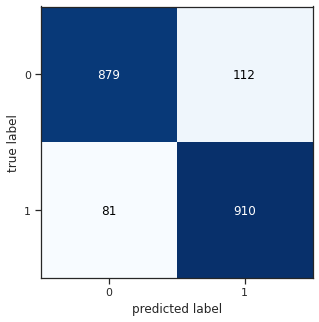

In [312]:
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(d_over['BadCredit'], y_pred.flatten())
plot_confusion_matrix(cm)
plt.show()

(<Figure size 576x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4e886d85d0>)

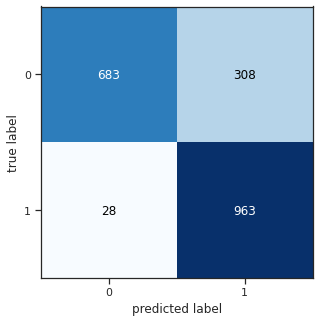

In [313]:
cm1 = confusion_matrix(d_over['BadCredit'], y_pred_lgb.flatten())
plot_confusion_matrix(cm1)
plt.show()